In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import f1_score

In [2]:
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)
# print(data_breast_cancer['DESCR'])

<AxesSubplot:xlabel='x', ylabel='y'>

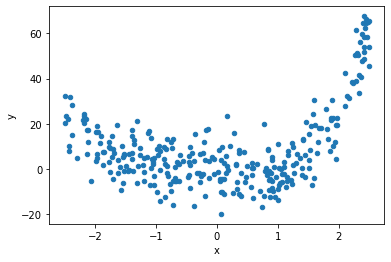

In [3]:
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

In [4]:
cancer_data = pd.concat([data_breast_cancer["target"], data_breast_cancer["data"]['mean texture'], data_breast_cancer["data"]['mean symmetry']], axis=1)

In [5]:
# f = "data_breast_cancer_tree.dot"
# export_graphviz(tree_clf, out_file=f, feature_names=['mean texture',  'mean symmetry'], class_names=[str(num)+", "+name for num,name in zip(set(data_breast_cancer.target), data_breast_cancer.target_names)], rounded=True, filled=True)
# print(f)
# cancer_score = f1_score(train['target'], y_train_pred)
# print(f'f1_score_max_depth=none: {cancer_score}')


max_depths_amounts = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for j in range(20):
    train, test = train_test_split(cancer_data, test_size=.2)
    max_train_score = 0
    max_test_score = 0
    max_depth = None
    for i in range(20):
        if(i == 0):
            tree_clf_perm = DecisionTreeClassifier()
            tree_clf_perm.fit(train[['mean texture',  'mean symmetry']], train['target'])
        else:
            tree_clf_perm = DecisionTreeClassifier(max_depth=i)
            tree_clf_perm.fit(train[['mean texture',  'mean symmetry']], train['target'])

        y_train_pred_perm = tree_clf_perm.predict(train[['mean texture',  'mean symmetry']])
        y_test_pred_perm = tree_clf_perm.predict(test[['mean texture',  'mean symmetry']])

        cancer_score_train_perm = f1_score(train['target'], y_train_pred_perm)
        cancer_score_test_perm = f1_score(test['target'], y_test_pred_perm)
        if((cancer_score_train_perm < 1 and cancer_score_test_perm < 1) and (max_train_score < cancer_score_train_perm and max_test_score < cancer_score_test_perm)):
            max_train_score = cancer_score_train_perm
            max_test_score = cancer_score_test_perm
            max_depth = i
        else:
            max_train_test_score = None
        # if(i == 0):
            # print(f'max_depth=none \n TRAIN: {cancer_score_train_perm} | TEST: {cancer_score_test_perm} \n ')
        # else:
            # print(f'max_depth={i} \n TRAIN: {cancer_score_train_perm} | TEST: {cancer_score_test_perm} \n ')
    print(f'{j+1}-th optimal max_depth={max_depth} {max_train_score}, {max_test_score}')
    max_depths_amounts[max_depth] =  max_depths_amounts[max_depth] + 1
print(max_depths_amounts)

max_depth_max_count = 0
max_depth_max_count_index = None

for index,count  in enumerate(max_depths_amounts):
    if(max_depth_max_count < count):
        max_depth_max_count_index = index
        max_depth_max_count = count
        
print(f'{max_depth_max_count}/20 times the optimal was max_depth={max_depth_max_count_index+1}')

1-th optimal max_depth=2 0.8221476510067114, 0.8280254777070064
2-th optimal max_depth=3 0.8393782383419688, 0.8050314465408805
3-th optimal max_depth=3 0.8431061806656102, 0.8
4-th optimal max_depth=3 0.8309178743961354, 0.8322981366459626
5-th optimal max_depth=3 0.8380952380952381, 0.8104575163398693
6-th optimal max_depth=2 0.8280467445742904, 0.8301886792452831
7-th optimal max_depth=1 0.7773722627737226, 0.787878787878788
8-th optimal max_depth=3 0.8344155844155844, 0.8133333333333332
9-th optimal max_depth=4 0.8338983050847457, 0.8484848484848484
10-th optimal max_depth=2 0.8260869565217391, 0.8395061728395061
11-th optimal max_depth=3 0.8091872791519434, 0.8
12-th optimal max_depth=2 0.8412438625204582, 0.7870967741935484
13-th optimal max_depth=3 0.8450244698205547, 0.7919463087248322
14-th optimal max_depth=3 0.832764505119454, 0.8108108108108109
15-th optimal max_depth=2 0.8308702791461412, 0.8027210884353742
16-th optimal max_depth=3 0.8269896193771625, 0.8441558441558441
1

In [6]:
train, test = train_test_split(cancer_data, test_size=.2)
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(train[['mean texture',  'mean symmetry']], train['target'])
y_train_pred = tree_clf.predict(train[['mean texture',  'mean symmetry']])

print(data_breast_cancer.target_names,"\n",  data_breast_cancer['target'])
print(y_train_pred)

['malignant' 'benign'] 
 0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32
[1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1
 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0
 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1
 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0
 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1
 1 1 1 1 0 